# Convolutional Neural Network

## Preparation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.utils.vis_utils import plot_model
import keras
import numpy as np
import PIL
from PIL import Image
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from scipy.spatial import distance
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


Unzipping the training dataset

In [ ]:
!unzip -q /content/drive/MyDrive/datasets/unbalanced_dataset_2304.zip

In [ ]:
TRAINING_PATH = "/content/unbalanced_dataset_2304/training"
CHECKPOINT_PATH = '/content/drive/MyDrive/saved_models/CNN_Keras_1/checkpoints/victor_CNN_droput_Adam_default_lowdataaugm.hdf5'

Unzipping the competition dataset

In [ ]:
!unzip -q /content/drive/MyDrive/datasets/challenge_test_data.zip

In [ ]:
GALLERY_PATH = "/content/gallery"
QUERY_PATH = "/content/query"

In [ ]:
# dimensions of our images.
img_width, img_height = 256, 256

train_data_dir = TRAINING_PATH


epochs = 100
batch_size = 16
lr = 0.001

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

## Defining the CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding = 'same', strides = 2))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding = 'same', strides = 2))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding = 'same', strides = 2))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding = 'same', strides = 2))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())

model.add(Dense(101)) # 101 number of classes
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2, #apply shear mapping
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # !!!

# this is the augmentation configuration we will use for testing:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1. / 255) 

In [ ]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True,
    subset='training')

# this is a similar generator, for validation data
validation_generator = valid_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False,
    subset='validation')


Found 26434 images belonging to 101 classes.
Found 6570 images belonging to 101 classes.


In [ ]:
nb_train_samples = 26434 # number of total images * 0.8
nb_validation_samples = 6570 # number of total images * 0.2

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5) # stop the training if validation loss has not improved for 5 epochs
checkpointer = ModelCheckpoint(filepath= CHECKPOINT_PATH, verbose=1, save_best_only=True)


## Training of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                        

In [ ]:
 model.fit_generator(
     train_generator,
     steps_per_epoch=nb_train_samples // batch_size,
     epochs=epochs,
     callbacks=[early_stop, checkpointer],
     validation_data=validation_generator,
     validation_steps=nb_validation_samples // batch_size
     )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
1652/1652 [==============================] - ETA: 0s - loss: 4.0433 - accuracy: 0.0837
Epoch 1: val_loss improved from inf to 4.13086, saving model to /content/drive/MyDrive/saved_models/CNN_Keras_1/checkpoints/victor_CNN_droput_Adam_default_lowdataaugm.hdf5
1652/1652 [==============================] - 567s 342ms/step - loss: 4.0433 - accuracy: 0.0837 - val_loss: 4.1309 - val_accuracy: 0.0905
Epoch 2/100
1652/1652 [==============================] - ETA: 0s - loss: 3.6740 - accuracy: 0.1370
Epoch 2: val_loss improved from 4.13086 to 3.90226, saving model to /content/drive/MyDrive/saved_models/CNN_Keras_1/checkpoints/victor_CNN_droput_Adam_default_lowdataaugm.hdf5
1652/1652 [==============================] - 565s 342ms/step - loss: 3.6740 - accuracy: 0.1370 - val_loss: 3.9023 - val_accuracy: 0.1319
Epoch 3/100
1652/1652 [==============================] - ETA: 0s - loss: 3.4312 - accuracy: 0.1747
Epoch 3: val_loss improved from 3.90226 to 3.80734, saving model to /content/driv

In [ ]:
model.save(CHECKPOINT_PATH)

## Loading saved model

In [ ]:
model = keras.models.load_model(CHECKPOINT_PATH)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_60 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_54 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_55 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 activation_61 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 batch_normalization_55 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                     

## Cutting last layers and attaching to new model

In [ ]:
feat_extractor = Model(inputs= model.input, outputs=model.get_layer('global_average_pooling2d_6').output) # we get the 256

In [ ]:
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54_input (InputLayer  [(None, 256, 256, 3)]    0         
 )                                                               
                                                                 
 conv2d_54 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_60 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_54 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_55 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 activation_61 (Activation)  (None, 128, 128, 32)      0     

## Feature extraction for Image retrieval

Loading the images 

gallery_images and query_images both contain the lists of the images paths

In [ ]:
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)

gallery_images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(GALLERY_PATH) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
print("%d gallery images to analyze" % len(gallery_images))

6355 gallery images to analyze


In [ ]:
query_images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(QUERY_PATH) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
print("%d query images to analyze" % len(query_images))

65 query images to analyze


Extracting the features of both query and gallery and attaching them to query_features and gallery_features. Each feature vector has length 256.

In [ ]:
def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [ ]:
import time
tic = time.clock()


query_features = []
for i, image_path in enumerate(query_images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(query_images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    query_features.append(feat)


print('finished extracting features for %d images' % len(query_images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


analyzing image 0 / 65. Time: 0.0006 seconds.
finished extracting features for 65 images


In [ ]:
import time
tic = time.clock()


gallery_features = []
for i, image_path in enumerate(gallery_images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(gallery_images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    gallery_features.append(feat)


print('finished extracting features for %d images' % len(gallery_images))

analyzing image 0 / 6355. Time: 0.0003 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


analyzing image 500 / 6355. Time: 28.7881 seconds.
analyzing image 1000 / 6355. Time: 29.9066 seconds.
analyzing image 1500 / 6355. Time: 29.4259 seconds.
analyzing image 2000 / 6355. Time: 28.7669 seconds.
analyzing image 2500 / 6355. Time: 28.7143 seconds.
analyzing image 3000 / 6355. Time: 29.4204 seconds.
analyzing image 3500 / 6355. Time: 28.9297 seconds.
analyzing image 4000 / 6355. Time: 29.5087 seconds.
analyzing image 4500 / 6355. Time: 28.8671 seconds.
analyzing image 5000 / 6355. Time: 29.2085 seconds.
analyzing image 5500 / 6355. Time: 28.9260 seconds.
analyzing image 6000 / 6355. Time: 28.8395 seconds.
finished extracting features for 6355 images


In [1]:
def get_closest_images_cosine(query_image_idx, num_results=10):
    distances = [ distance.cosine(query_features[query_image_idx], feat) for feat in gallery_features]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[:num_results]
    return idx_closest

def get_closest_images_euclidean(query_image_idx, num_results=10):
    distances = [ distance.euclidean(query_features[query_image_idx], feat) for feat in gallery_features]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[:num_results]
    return idx_closest

In [ ]:
def get_closest_dict(query_images, gallery_images, distance = 'cosine'):
  res = {}
  for i in range(len(query_images)):

    if distance == 'chebyshev':
      idx_closest = get_closest_images_chebyshev(i)
    elif distance == 'euclidean':
      idx_closest = get_closest_images_euclidean(i)
    else:
      idx_closest = get_closest_images_cosine(i)
      
    closest_images_list = [gallery_images[idx] for idx in idx_closest]
    res[query_images[i]] = closest_images_list

  return res

In [ ]:
dizionario = get_closest_dict(query_images, gallery_images, 'cosine')

{'/content/query/013c80f43deff8d61b6a2021f9b0a335665fdd1f.jpg': ['/content/gallery/9f974c147547c74ea71242530b4482f0ffca84d1.jpg',
  '/content/gallery/7a960fe8ae51fb5d08d27ebadab49eb322d106fd.jpg',
  '/content/gallery/4bcb61de2990adf42ec82c98d701eecb2a38d3be.jpg',
  '/content/gallery/753604b63d559d50b074e802b81addb7510c1e09.jpg',
  '/content/gallery/fea5f1acc5b879e6975a3f1540d258c25f9df553.jpg',
  '/content/gallery/e2174f233e3e363d1f619d302150b2fc6700f46d.jpg',
  '/content/gallery/e309250cf891d54d3998f31c8c02aae54e2066da.jpg',
  '/content/gallery/5961c35b369a6cc512354539127d97b338d1ecf6.jpg',
  '/content/gallery/a7888136aea6f2b596c1332f2db6046a6eef4e60.jpg',
  '/content/gallery/1a775a38f13193d5e912847896bc5684c22bf13b.jpg'],
 '/content/query/03ee85dcb5158552d2895d6d37effd2fad0fffde.jpg': ['/content/gallery/a83503289d2e7dc5358bb121b22ab05a9c922724.jpg',
  '/content/gallery/2abb7ad33c99d7c2d71bc227e5c2aa41beef420c.jpg',
  '/content/gallery/34f80641f97417079af9b868977d83bb1fc6dfe9.jpg',
  

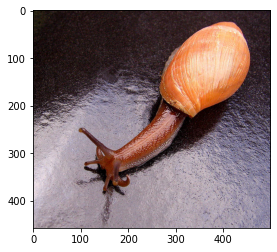

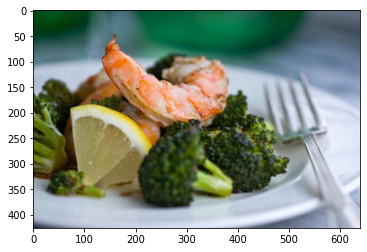

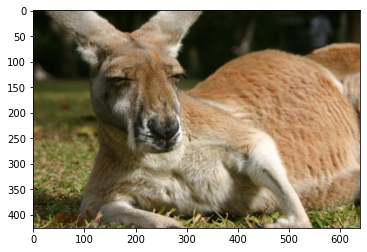

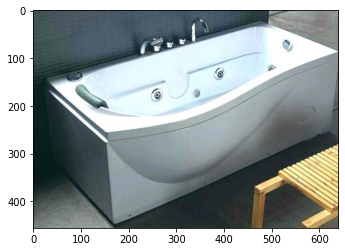

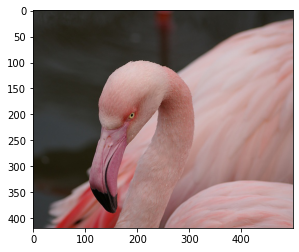

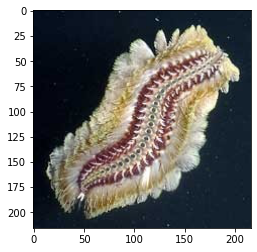

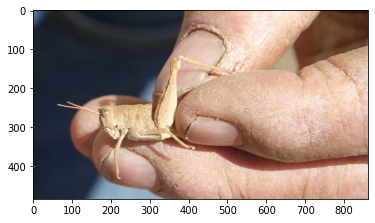

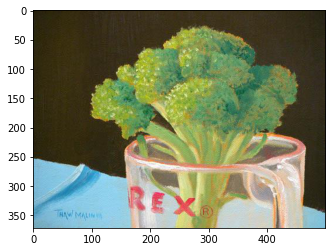

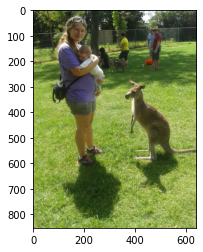

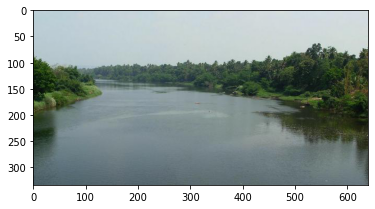

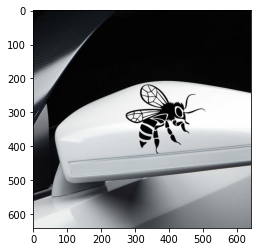

In [ ]:
plt.imshow(plt.imread('/content/query/1c16dc110f78c763c3803c599dc14331da0c7294.jpg'))
plt.show()
print('\n\n')
for similar_img in dizionario['/content/query/1c16dc110f78c763c3803c599dc14331da0c7294.jpg']:
  plt.imshow(plt.imread(similar_img))
  plt.show()
  print("\n")